In [1]:
!pip install datasets transformers

# Mini-project 1

Apply Transformers & its variants for a text classification problem.

## Problem statement
- Given a set of Transformers variants and a text classification dataset. Your task is to make a complete pipeline from input to output.
- Your pipeline **SHOULD** include the following required components. Each component **SHOULD** be organized into different `class` object.
    - Load & discover dataset
    - Preprocess data
    - Tokenize data
    - Create a DataLoader
    - Build or load model
    - Create a training workflow
    - Set up hyperparameters for training procedure
    - Train model
    - Evaluate model
    - Infer model


## Dataset demonstration
In this project, we would conduct classification on [IMDb dataset](https://ai.stanford.edu/~amaas/data/sentiment/), which is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. This dataset provides a set of 25 000 highly polar movie reviews for training, and 25 000 for testing. There is additional unlabeled data for use as well. Raw text and already processed bag of words formats are provided.

In [2]:
from datasets import load_dataset

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
imdb_dataset = load_dataset("imdb")

### Train set

In [4]:
imdb_train_set = imdb_dataset["train"]
imdb_train_set

Dataset({
    features: ['text', 'label'],
    num_rows: 25000
})

In [5]:
imdb_train_set[0]

{'text': 'I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are few and far be

### Test set

In [6]:
imdb_test_set = imdb_dataset["test"]
imdb_test_set

Dataset({
    features: ['text', 'label'],
    num_rows: 25000
})

In [7]:
imdb_test_set[0]

{'text': 'I love sci-fi and am willing to put up with a lot. Sci-fi movies/TV are usually underfunded, under-appreciated and misunderstood. I tried to like this, I really did, but it is to good TV sci-fi as Babylon 5 is to Star Trek (the original). Silly prosthetics, cheap cardboard sets, stilted dialogues, CG that doesn\'t match the background, and painfully one-dimensional characters cannot be overcome with a \'sci-fi\' setting. (I\'m sure there are those of you out there who think Babylon 5 is good sci-fi TV. It\'s not. It\'s clichéd and uninspiring.) While US viewers might like emotion and character development, sci-fi is a genre that does not take itself seriously (cf. Star Trek). It may treat important issues, yet not as a serious philosophy. It\'s really difficult to care about the characters here as they are not simply foolish, just missing a spark of life. Their actions and reactions are wooden and predictable, often painful to watch. The makers of Earth KNOW it\'s rubbish as 

## List of models for this project

In [8]:
import torch
from torch import nn

### BERT
- BERT is a deep learning language model designed to improve the efficiency of natural language processing (NLP) tasks. It is famous for its ability to consider context by analyzing the relationships between words in a sentence bidirectionally. It was introduced by Google researchers in a 2018 paper titled “BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding.” Since then, the BERT model has been fine-tuned for use in a variety of fields, including biology, data science, and medicine.

- You could discover [BERT documentation](https://huggingface.co/docs/transformers/en/model_doc/bert) from transformers library @ Huggingface for more details.

- Examples of training use case for Huggingface model: [Huggingface training](https://huggingface.co/docs/transformers/en/training)

In [9]:
from transformers import (
    BertForSequenceClassification,
    BertTokenizer
)

In [10]:
# Load tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased',
                                          do_lower_case=True)

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:896: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [11]:
example = imdb_train_set[0]['text']
print('Original: ', example)

# Print the sentence split into tokens.
print('Tokenized: ', tokenizer.tokenize(example))

# Print the sentence mapped to token ids.
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(example)))

Original:  I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are few and far b

In [12]:
# Load model
bert_model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased",
    num_labels = 1
)

bert_model

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [13]:
# QC
example_tensor = torch.ones(1, 512).type(torch.long)
example_bert_output = bert_model(example_tensor)
example_bert_output

SequenceClassifierOutput(loss=None, logits=tensor([[0.4526]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

### XLNet

The XLNet model was proposed in XLNet: Generalized Autoregressive Pretraining for Language Understanding by ([Yang et al., 2019](https://arxiv.org/pdf/1906.08237)). XLnet is an extension of the Transformer-XL model pre-trained using an autoregressive method to learn bidirectional contexts by maximizing the expected likelihood over all permutations of the input sequence factorization order.

In [14]:
from transformers import XLNetTokenizer, XLNetForSequenceClassification

In [15]:
tokenizer = XLNetTokenizer.from_pretrained('xlnet-base-cased', do_lower_case=True)

tokenized_texts = imdb_train_set[0]['text']
tokenizer(tokenized_texts)

{'input_ids': [17, 150, 14210, 17, 150, 569, 8595, 13, 27886, 40, 94, 894, 1515, 149, 20, 71, 18, 6289, 29, 5197, 36, 90, 36, 30, 89, 528, 25, 5079, 9, 17, 150, 77, 1133, 29, 38, 89, 36, 30, 4665, 37, 17, 660, 9, 23, 9, 9268, 108, 36, 545, 1000, 22, 2137, 52, 234, 19, 2412, 163, 24, 3054, 20, 2701, 957, 17, 12, 1865, 2530, 7257, 2359, 12, 17, 150, 343, 54, 22, 197, 52, 28, 1546, 9, 6461, 2369, 17, 167, 3151, 6461, 2369, 17, 167, 3151, 305, 4487, 27, 12163, 199, 24, 673, 17, 23, 7954, 1406, 3733, 1190, 812, 17, 529, 597, 61, 1578, 22, 1184, 931, 85, 64, 75, 235, 9, 25, 1244, 85, 1578, 22, 1304, 62, 1219, 23, 22, 441, 106, 1968, 20, 6313, 31, 113, 18, 905, 17, 23, 7954, 93, 449, 75, 1028, 413, 705, 148, 34, 18, 17, 9209, 46, 8353, 375, 21, 878, 705, 25, 18, 9114, 1035, 9, 25, 161, 2860, 4380, 21, 5595, 17, 1426, 2252, 3673, 20, 1002, 18242, 75, 58, 7116, 31, 2523, 19, 85, 51, 2216, 33, 62, 3733, 2804, 19, 21700, 19, 21, 1492, 416, 9, 6461, 2369, 17, 167, 3151, 6461, 2369, 17, 167, 3151, 

In [16]:
model = XLNetForSequenceClassification.from_pretrained("xlnet-base-cased",
                                                       num_labels=1)
model

Some weights of XLNetForSequenceClassification were not initialized from the model checkpoint at xlnet-base-cased and are newly initialized: ['logits_proj.bias', 'logits_proj.weight', 'sequence_summary.summary.bias', 'sequence_summary.summary.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


XLNetForSequenceClassification(
  (transformer): XLNetModel(
    (word_embedding): Embedding(32000, 768)
    (layer): ModuleList(
      (0-11): 12 x XLNetLayer(
        (rel_attn): XLNetRelativeAttention(
          (layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (dropout): Dropout(p=0.1, inplace=False)
        )
        (ff): XLNetFeedForward(
          (layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (layer_1): Linear(in_features=768, out_features=3072, bias=True)
          (layer_2): Linear(in_features=3072, out_features=768, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (activation_function): GELUActivation()
        )
        (dropout): Dropout(p=0.1, inplace=False)
      )
    )
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (sequence_summary): SequenceSummary(
    (summary): Linear(in_features=768, out_features=768, bias=True)
    (activation): Tanh()
    (first_dropout): Identity()
    (last

In [17]:
# QC
example_tensor = torch.ones(1, 768).type(torch.long)
example_xlnet_output = model(example_tensor)
example_xlnet_output

XLNetForSequenceClassificationOutput(loss=None, logits=tensor([[-0.0245]], grad_fn=<AddmmBackward0>), mems=(tensor([[[ 0.0381,  0.0197,  0.0264,  ..., -0.0002, -0.0350,  0.0263]],

        [[ 0.0381,  0.0197,  0.0264,  ..., -0.0002, -0.0350,  0.0263]],

        [[ 0.0381,  0.0197,  0.0264,  ..., -0.0002, -0.0350,  0.0263]],

        ...,

        [[ 0.0381,  0.0197,  0.0264,  ..., -0.0002, -0.0350,  0.0263]],

        [[ 0.0381,  0.0197,  0.0264,  ..., -0.0002, -0.0350,  0.0263]],

        [[ 0.0381,  0.0197,  0.0264,  ..., -0.0002, -0.0350,  0.0263]]]), tensor([[[ 0.7508,  1.7381,  0.1382,  ..., -0.0210,  0.2592, -0.1314]],

        [[ 0.7508,  1.7381,  0.1382,  ..., -0.0210,  0.2592, -0.1314]],

        [[ 0.7508,  1.7381,  0.1382,  ..., -0.0210,  0.2592, -0.1314]],

        ...,

        [[ 0.7508,  1.7381,  0.1382,  ..., -0.0210,  0.2592, -0.1314]],

        [[ 0.7508,  1.7381,  0.1382,  ..., -0.0210,  0.2592, -0.1314]],

        [[ 0.7508,  1.7381,  0.1382,  ..., -0.0210,  0.2592,

# Load and Discover Dataset

In [1]:
# Load and discover datasets
from datasets import load_dataset
import matplotlib.pyplot as plt
import pandas as pd

class DatasetLoader:
    def __init__(self, dataset_name):
        self.dataset_name = dataset_name
        self.dataset = None

    def load(self):
        self.dataset = load_dataset(self.dataset_name)
        return self.dataset

    def discover(self):
        if self.dataset is None:
            print("Dataset not loaded yet. Call load() first.")
            return

        print(f"Dataset Name: {self.dataset_name}")
        print("Available Splits:")
        for split_name in self.dataset:
            print(f"- {split_name}: {len(self.dataset[split_name])} examples")
            print(f"  Example: {self.dataset[split_name][0]}")

        print(f"Review length distribution: ")
        for split_name in self.dataset:
            review_len = [len(review.split()) for review in self.dataset[split_name]['text']]
            plt.figure(figsize=(10, 5))
            plt.hist(review_len, bins=50)
            plt.title(f"Review Length Distribution ({split_name})")
            plt.xlabel("Review Length")
            plt.ylabel("Count")
            plt.show()

            print(f"Average review length for {split_name}: {sum(review_len)/len(review_len)}")
            print(f"Max review length for {split_name}: {max(review_len)}")
            print(f"Min review length for {split_name}: {min(review_len)}")

        print("Label Distribution")
        for split_name in self.dataset:
            value_counts = pd.Series(self.dataset[split_name]['label']).value_counts()
            plt.figure(figsize=(5, 3))
            plt.bar(x=value_counts.keys(), height=value_counts.values)
            plt.title(f"Lable Distribution ({split_name})")
            plt.xticks(ticks=value_counts.keys())
            plt.xlabel("Label")
            plt.ylabel("Count")
            plt.show()

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Dataset Name: imdb
Available Splits:
- train: 25000 examples
  Example: {'text': 'I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was consi

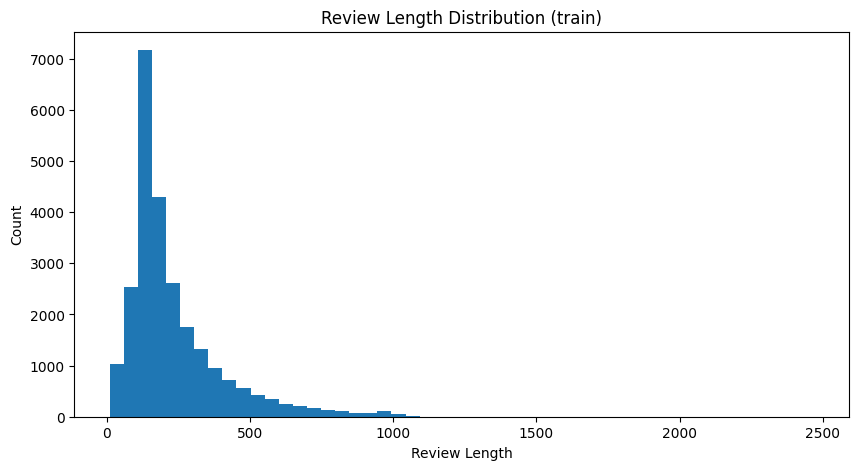

Average review length for train: 233.7872
Max review length for train: 2470
Min review length for train: 10


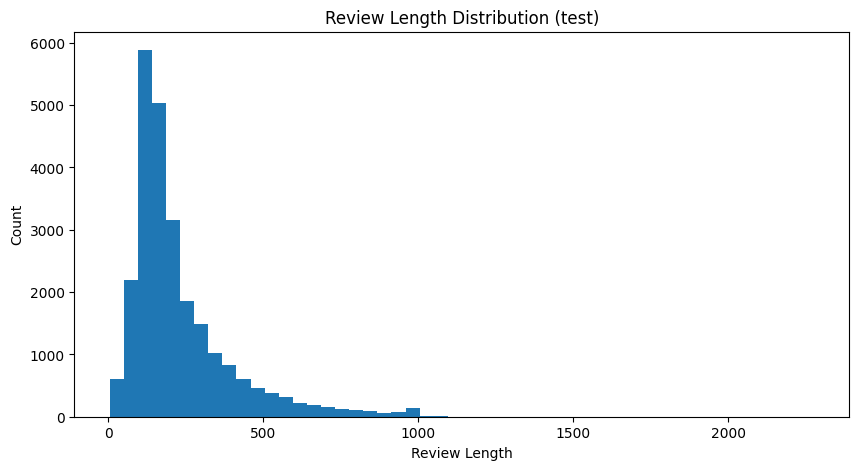

Average review length for test: 228.52668
Max review length for test: 2278
Min review length for test: 4


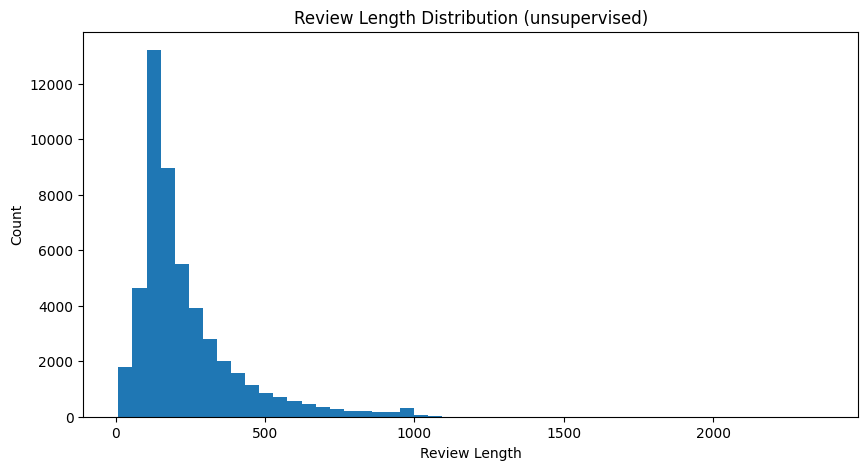

Average review length for unsupervised: 234.43364
Max review length for unsupervised: 2367
Min review length for unsupervised: 9
Label Distribution


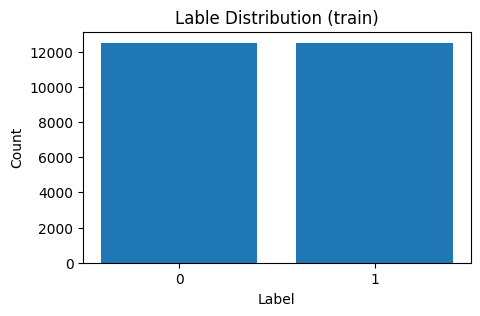

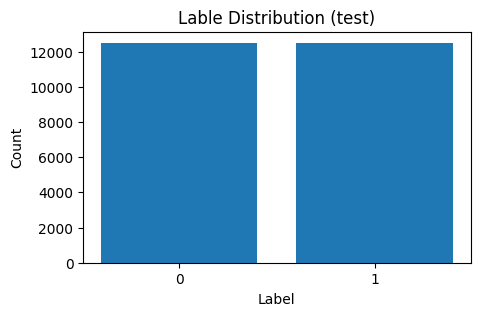

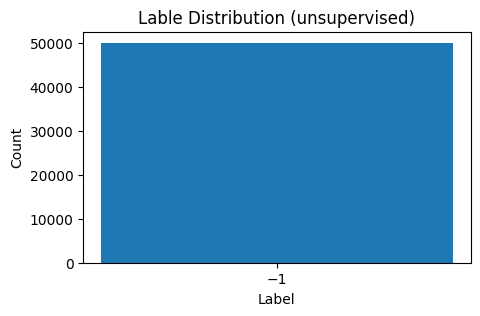

In [2]:
loader = DatasetLoader("imdb")
imdb_dataset = loader.load()
loader.discover()

## Preprocess Data

In [3]:
# Preprocessing
import re

class Preprocessor:
    def __init__(self, lowercase=True, remove_html=True, remove_numbers=True, remove_special_chars=True):
        self.lowercase = lowercase
        self.remove_html = remove_html
        self.remove_numbers = remove_numbers
        self.remove_special_chars = remove_special_chars

    def preprocess_text(self, text):
        if self.lowercase:
            text = text.lower()

        if self.remove_html:
            text = re.sub(r"<(?:\"[^\"]*\"['\"]*|'[^']*'['\"]*|[^'\">])+>", '', text)

        if self.remove_numbers:
            text = re.sub(r"[0-9]", "", text)

        if self.remove_special_chars:
            text = re.sub(r"[^a-zA-Z\s\.\,\-]", "", text)

        text = re.sub(r"\s+", " ", text).strip()

        return text

    def preprocess_dataset(self, dataset):
        processed_dataset = dataset.map(lambda example: {'text': self.preprocess_text(example['text'])})
        return processed_dataset

In [4]:
imdb_dataset = Preprocessor().preprocess_dataset(imdb_dataset)
imdb_train_set = imdb_dataset["train"]
imdb_test_set = imdb_dataset["test"]

## Tokenize data

In [5]:
# Tokenize dữ liệu
from transformers import BertTokenizerFast
from transformers import XLNetTokenizerFast

class Tokenizer:
    def __init__(self, model_name, max_length=128):
        if 'bert' in model_name:
            self.tokenizer = BertTokenizerFast.from_pretrained(model_name)
        elif 'xlnet' in model_name:
            self.tokenizer = XLNetTokenizerFast.from_pretrained(model_name)
        self.max_length = max_length

    def tokenize_function(self, examples):
        return self.tokenizer(
            examples["text"],
            truncation=True,
            padding="max_length",
            max_length=self.max_length
        )

tokenizer = Tokenizer('bert-base-uncased')

imdb_train_set = imdb_train_set.map(tokenizer.tokenize_function, batched=True)
imdb_test_set = imdb_test_set.map(tokenizer.tokenize_function, batched=True)

imdb_train_set.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])
imdb_test_set.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:896: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Map: 100%|██████████| 25000/25000 [00:04<00:00, 5566.41 examples/s]


## Create a DataLoader

In [ ]:
# Create a DataLoader
from torch.utils.data import DataLoader
from transformers import DataCollatorWithPadding

class DataLoaderCreator:
    def __init__(self, dataset, batch_size):
        self.dataset = dataset
        self.batch_size = batch_size
        self.data_collator = DataCollatorWithPadding(tokenizer=tokenizer)
        self.dataloader = None

    def create_dataloader(self):
        self.dataloader = DataLoader(self.dataset, batch_size=self.batch_size, collate_fn=self.data_collator, num_workers=8, pin_memory=True)
        return self.dataloader

imdb_train_dataloader = DataLoaderCreator(imdb_train_set, batch_size=32).create_dataloader()
imdb_test_dataloader = DataLoaderCreator(imdb_test_set, batch_size=32).create_dataloader()

## Build or Load Model

In [7]:
# Build or Load Model
from torch.optim import AdamW
from transformers import BertForSequenceClassification, XLNetForSequenceClassification

class ModelBuilder:
    def __init__(self, model_name, num_labels=2):
        if 'bert' in model_name:
            self.model_class = BertForSequenceClassification
        elif 'xlnet' in model_name:
            self.model_class = XLNetForSequenceClassification
        self.model_name = model_name
        self.num_labels = num_labels
        self.model = None

    def build_model(self):
        self.model = self.model_class.from_pretrained(self.model_name, num_labels=self.num_labels)
        return self.model
    
    def optimizer(self, learning_rate=5e-5):
        return AdamW(self.model.parameters(), lr=learning_rate)
    
model_builder = ModelBuilder('bert-base-uncased')
bert_model = model_builder.build_model()
optimizer = model_builder.optimizer()

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:896: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


## Train model

In [ ]:
# Train the model
from transformers import Trainer, TrainingArguments, EvalPrediction, TrainerCallback
import numpy as np
from sklearn.metrics import accuracy_score

class LossCallback(TrainerCallback):
    def on_log(self, args, state, control, logs=None, **kwargs):
        if logs and "loss" in logs:
            print(f"[Epoch {state.epoch}] Training Loss: {logs['loss']}")

    def on_evaluate(self, args, state, control, metrics, **kwargs):
        if "eval_loss" in metrics:
            print(f"[Epoch {state.epoch}] Eval Loss: {metrics['eval_loss']}")

class TrainerBuilder:
    def __init__(self, model, train_dataloader, epochs=3):
        self.model = model
        self.train_dataset = train_dataloader.dataset
        self.epochs = epochs

    def train(self):
        # Set up hyperparameters for training procedure
        training_args = TrainingArguments(
            output_dir="./results",
            evaluation_strategy="no",
            save_strategy="no",
            logging_strategy="epoch",
            learning_rate=0.001,
            per_device_train_batch_size=16,
            num_train_epochs=self.epochs,
            weight_decay=0.01,
            load_best_model_at_end=False,
            logging_dir="./logs",
            report_to="none"
        )

        trainer = Trainer(
            model=self.model,
            args=training_args,
            train_dataset=self.train_dataset,
            callbacks=[LossCallback()]
        )

        trainer.train()
        return trainer

In [ ]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
bert_model.to(device)
# Train the model using TrainerBuilder
trainer_builder = TrainerBuilder(bert_model, imdb_train_dataloader)
trainer = trainer_builder.train()
# Save the model
trainer.save_model("bert-imdb")

 33%|███▎      | 1563/4689 [23:13<16:36,  3.14it/s]     

[Epoch 1.0] Training Loss: 0.7367
{'loss': 0.7367, 'grad_norm': 2.237651824951172, 'learning_rate': 0.0006666666666666666, 'epoch': 1.0}


 67%|██████▋   | 3126/4689 [34:07<09:40,  2.69it/s]

[Epoch 2.0] Training Loss: 0.7244
{'loss': 0.7244, 'grad_norm': 5.388290882110596, 'learning_rate': 0.0003333333333333333, 'epoch': 2.0}


100%|██████████| 4689/4689 [52:11<00:00,  1.50it/s]    


[Epoch 3.0] Training Loss: 0.7044
{'loss': 0.7044, 'grad_norm': 4.3422651290893555, 'learning_rate': 0.0, 'epoch': 3.0}
{'train_runtime': 3131.1704, 'train_samples_per_second': 23.953, 'train_steps_per_second': 1.498, 'train_loss': 0.7218571567515062, 'epoch': 3.0}


## Evaluate model

In [9]:
# Evaluate the model
class Evaluator:
    def __init__(self, model, eval_dataloader):
        self.model = model
        self.eval_dataset = eval_dataloader.dataset

    def compute_metrics(self, eval_pred: EvalPrediction):
        logits, labels = eval_pred
        preds = np.argmax(logits, axis=1)
        acc = accuracy_score(labels, preds)
        return {"accuracy": acc}

    def evaluate(self):
        eval_args = TrainingArguments(
            output_dir="./results_eval",
            per_device_eval_batch_size=16,
            evaluation_strategy="epoch",
            save_strategy="epoch",
            logging_dir="./logs_eval",
            report_to="none"
        )

        trainer = Trainer(
            model=self.model,
            args=eval_args,
            eval_dataset=self.eval_dataset,
            compute_metrics=self.compute_metrics,
            callbacks=[LossCallback()]
        )

        metrics = trainer.evaluate()
        print(f"Evaluation results: {metrics}")
        return metrics

In [32]:
# Evaluate the model
evaluator = Evaluator(bert_model, imdb_test_dataloader)
print(evaluator.evaluate())

100%|██████████| 1563/1563 [03:16<00:00,  7.94it/s]

[Epoch None] Eval Loss: 0.6932206153869629
Evaluation results: {'eval_loss': 0.6932206153869629, 'eval_accuracy': 0.5, 'eval_runtime': 197.0355, 'eval_samples_per_second': 126.881, 'eval_steps_per_second': 7.933}
{'eval_loss': 0.6932206153869629, 'eval_accuracy': 0.5, 'eval_runtime': 197.0355, 'eval_samples_per_second': 126.881, 'eval_steps_per_second': 7.933}


## Infer model

In [14]:
# Infer model
from transformers import pipeline

class Inference:
    def __init__(self, model_name):
        self.model_name = model_name
        self.pipeline = None

    def load_pipeline(self):
        self.pipeline = pipeline("sentiment-analysis", model=self.model_name)
        return self.pipeline

    def predict(self, text):
        if self.pipeline is None:
            print("Pipeline not loaded yet. Call load_pipeline() first.")
            return
        return self.pipeline(text)

In [ ]:
inference = Inference('bert-base-uncased')
bert_model.save_pretrained("bert_imdb_infer")
inference.load_pipeline()
text = "This movie was fantastic! I loved it."
result = inference.predict(text)
print(result)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


[{'label': 'LABEL_1', 'score': 0.6264409422874451}]


## XLNet model

In [10]:
# Load model
model_builder = ModelBuilder('xlnet-base-cased')
xlnet_model = model_builder.build_model()

Some weights of XLNetForSequenceClassification were not initialized from the model checkpoint at xlnet-base-cased and are newly initialized: ['logits_proj.bias', 'logits_proj.weight', 'sequence_summary.summary.bias', 'sequence_summary.summary.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
xlnet_model.to(device)
# Train the model using TrainerBuilder
trainer_builder = TrainerBuilder(xlnet_model, imdb_train_dataloader)
trainer = trainer_builder.train()
# Save the model
trainer.save_model("xlnet-imdb")

 33%|███▎      | 1563/4689 [17:55<31:34,  1.65it/s] 

[Epoch 1.0] Training Loss: 0.7397
{'loss': 0.7397, 'grad_norm': 2.717670440673828, 'learning_rate': 0.0006666666666666666, 'epoch': 1.0}


 67%|██████▋   | 3126/4689 [36:12<16:02,  1.62it/s]

[Epoch 2.0] Training Loss: 0.7251
{'loss': 0.7251, 'grad_norm': 3.6662609577178955, 'learning_rate': 0.0003333333333333333, 'epoch': 2.0}


100%|██████████| 4689/4689 [54:39<00:00,  1.43it/s]


[Epoch 3.0] Training Loss: 0.7049
{'loss': 0.7049, 'grad_norm': 5.078327178955078, 'learning_rate': 0.0, 'epoch': 3.0}
{'train_runtime': 3279.3525, 'train_samples_per_second': 22.87, 'train_steps_per_second': 1.43, 'train_loss': 0.7232470765605007, 'epoch': 3.0}


In [12]:
# Evaluate the model
evaluator = Evaluator(xlnet_model, imdb_test_dataloader)
print(evaluator.evaluate())

100%|██████████| 1563/1563 [04:56<00:00,  5.28it/s]

[Epoch None] Eval Loss: 0.6931632161140442
Evaluation results: {'eval_loss': 0.6931632161140442, 'eval_accuracy': 0.5, 'eval_runtime': 296.3256, 'eval_samples_per_second': 84.367, 'eval_steps_per_second': 5.275}
{'eval_loss': 0.6931632161140442, 'eval_accuracy': 0.5, 'eval_runtime': 296.3256, 'eval_samples_per_second': 84.367, 'eval_steps_per_second': 5.275}


In [16]:
# Infer model
inference = Inference('xlnet-base-cased')
xlnet_model.save_pretrained("xlnet_imdb_infer")
inference.load_pipeline()
text = "This movie was fantastic! I loved it."
result = inference.predict(text)
print(result)

Some weights of XLNetForSequenceClassification were not initialized from the model checkpoint at xlnet-base-cased and are newly initialized: ['logits_proj.bias', 'logits_proj.weight', 'sequence_summary.summary.bias', 'sequence_summary.summary.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


[{'label': 'LABEL_1', 'score': 0.7911401987075806}]
